In [2]:
import pandas as pd 
import numpy as np

In [2]:
x=np.linspace(1,100,100)

In [3]:
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [4]:
np.log1p(x)

array([0.69314718, 1.09861229, 1.38629436, 1.60943791, 1.79175947,
       1.94591015, 2.07944154, 2.19722458, 2.30258509, 2.39789527,
       2.48490665, 2.56494936, 2.63905733, 2.7080502 , 2.77258872,
       2.83321334, 2.89037176, 2.94443898, 2.99573227, 3.04452244,
       3.09104245, 3.13549422, 3.17805383, 3.21887582, 3.25809654,
       3.29583687, 3.33220451, 3.36729583, 3.40119738, 3.4339872 ,
       3.4657359 , 3.49650756, 3.52636052, 3.55534806, 3.58351894,
       3.61091791, 3.63758616, 3.66356165, 3.68887945, 3.71357207,
       3.73766962, 3.76120012, 3.78418963, 3.80666249, 3.8286414 ,
       3.8501476 , 3.87120101, 3.8918203 , 3.91202301, 3.93182563,
       3.95124372, 3.97029191, 3.98898405, 4.00733319, 4.02535169,
       4.04305127, 4.06044301, 4.07753744, 4.09434456, 4.11087386,
       4.12713439, 4.14313473, 4.15888308, 4.17438727, 4.18965474,
       4.20469262, 4.21950771, 4.2341065 , 4.24849524, 4.26267988,
       4.27666612, 4.29045944, 4.30406509, 4.31748811, 4.33073

In [15]:
df1 = pd.DataFrame({'coverage': ["one","two","three","four","one","three","four"],
                    })
df1

,coverage
0,one
1,two
2,three
3,four
4,one
5,three
6,four


In [14]:
df2 = pd.DataFrame({'coverage': ["one","two","three","four","one","three","four"],
                    'value': [1, 2, 3, 4,1,3,4]})
df2

,coverage,value
0,one,1
1,two,2
2,three,3
3,four,4
4,one,1
5,three,3
6,four,4


In [18]:
df1.merge(df2.drop_duplicates(),how="left",on="coverage")

,coverage,value
0,one,1
1,two,2
2,three,3
3,four,4
4,one,1
5,three,3
6,four,4


In [25]:
df3 = pd.DataFrame({'coverage': ["one","two","three","four","one","three","four"],
                    'id': [1, 22, 33, 4,10,3,42],
                      'name':["ahmed","mohamed","sayed","alaa","sarah","esmail","fuck"]})
df3

,coverage,id,name
0,one,1,ahmed
1,two,22,mohamed
2,three,33,sayed
3,four,4,alaa
4,one,10,sarah
5,three,3,esmail
6,four,42,fuck


In [28]:
df3.melt(id_vars="coverage",value_vars=["name","id"],var_name="ifo")

,coverage,ifo,value
0,one,name,ahmed
1,two,name,mohamed
2,three,name,sayed
3,four,name,alaa
4,one,name,sarah
5,three,name,esmail
6,four,name,fuck
7,one,id,1
8,two,id,22
9,three,id,33


In [3]:
df = pd.DataFrame({'angles': [0, 3, 4],
                   'degrees': [360, 180, 360]},
                  index=['circle', 'triangle', 'rectangle'])

In [4]:
other = pd.DataFrame({'angles': [0, 3, 4]},
                     index=['circle', 'triangle', 'rectangle'])

In [14]:
df.angles.mul(other.angles,axis=0)

circle        0
triangle      9
rectangle    16
Name: angles, dtype: int64

In [17]:
str="ererere"
str.split("r",1)

['e', 'erere']

In [18]:
df=pd.DataFrame({
    "name":["ahmed","mohamed","ahmed","salah","moahmed","ahmed"]
})

In [21]:
df.name.factorize()

(array([0, 1, 0, 2, 3, 0], dtype=int64),
 Index(['ahmed', 'mohamed', 'salah', 'moahmed'], dtype='object'))

In [23]:
from sklearn.preprocessing import LabelEncoder

In [25]:
l=LabelEncoder()
l.fit_transform(df.name)

array([0, 2, 0, 3, 1, 0])

def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score
    
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
    
- def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    #####  All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
    
  
  
  
-from category_encoders import MEstimateEncoder

    -  Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

     - Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

    -Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

In [26]:
import seaborn as sns

In [29]:
tip=sns.load_dataset("tips")

In [30]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
for i in tip.select_dtypes(include=["object","category"]).columns:
    tip[i],_=tip[i].factorize()

In [33]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,0,2
1,10.34,1.66,1,0,0,0,3
2,21.01,3.50,1,0,0,0,3
3,23.68,3.31,1,0,0,0,2
4,24.59,3.61,0,0,0,0,4


(array([8., 8., 8., 8., 8., 8., 8., 8., 8., 8.]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <BarContainer object of 10 artists>)

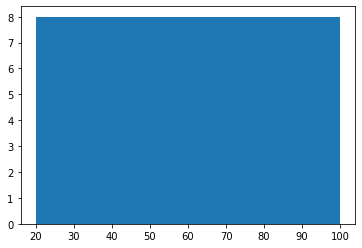

In [38]:
x=np.linspace(20,100,80)
plt.hist(x)

In [43]:
from scipy.stats import boxcox
c=boxcox(x)
v=np.log1p(x)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

c:\users\ae504\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

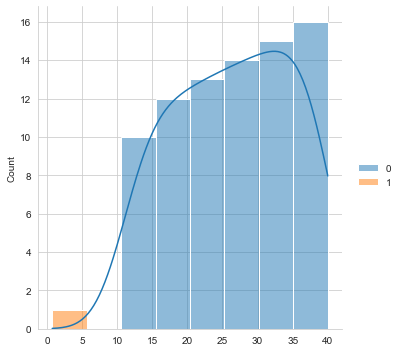

In [47]:
plt.figure()
sns.displot(c,color="red",kde=True)

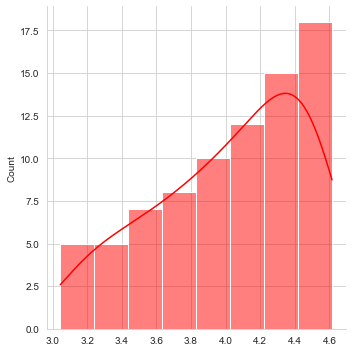

In [48]:
sns.displot(v,color="red",kde=True)